In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

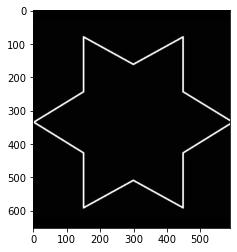

In [129]:
img = ~cv2.imread("images/test_star.jpg", cv2.IMREAD_GRAYSCALE)
img = ndimage.rotate(img, 90, reshape=False)

plt.imshow(img, cmap=plt.get_cmap('gray'))

# Horizontal filter

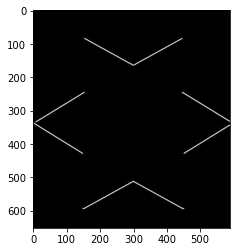

In [91]:
filter = np.array([[1, 1, 1],
                   [0, 0 ,0],
                   [-1,-1,-1]])

response = cv2.filter2D(img, ddepth=-1, kernel=SADecomp(filter, asym=True))
plt.imshow(response, cmap=plt.get_cmap('gray'))


array([[ 1.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1., -1., -1.]])

# Vertical filter

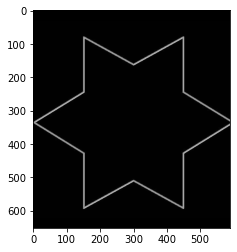

In [119]:
filter = np.array([[1, 0,-1],
                   [1, 0,-1],
                   [1, 0,-1]])

response = cv2.filter2D(img, ddepth=-1, kernel=SADecomp(np.array(filter) , asym=True) + SADecomp(np.array(filter) , asym=False))
plt.imshow(response, cmap=plt.get_cmap('gray'))

In [97]:
SADecomp(filter, asym=True)

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

In [5]:
print(response)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Diagonal filter

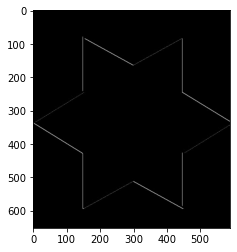

In [131]:
filter = np.array([[-0.0865837 ,  0.19084392,  0.16842183],
       [-0.18646947,  0.17608799,  0.15426615],
       [-0.23963833, -0.14159909, -0.10266907]])


response = cv2.filter2D(img, ddepth=-1, kernel=filter)
plt.imshow(response,  cmap=plt.get_cmap('gray'))

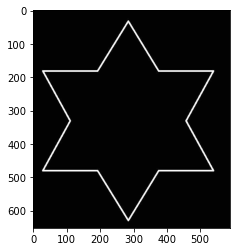

In [124]:
plt.imshow(img,  cmap=plt.get_cmap('gray'))

In [46]:


from tensorflow.keras.layers import Layer
from tensorflow.image import flip_up_down, flip_left_right, rot90
from tensorflow.compat.v1 import extract_image_patches
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import normalize

def SADecomp(filters, asym=False):
    inputs_shape = tf.shape(filters)  
        
    #height, width, n_channel, n_filters = inputs_shape[0], inputs_shape[1], inputs_shape[2], inputs_shape[3]
    k = filters.shape[0]
    exp_data  = tf.expand_dims(filters[0], 0)


    #patches = extract_image_patches(filters, [1, k, k, 1],  [1, k, k, 1], rates = [1,1,1,1] , padding = 'VALID')
    #print(patches)
    mat_flip_x = np.fliplr(filters)

    mat_flip_y = np.flipud(filters)

    mat_flip_xy =  np.fliplr( np.flipud(filters))

    sum = filters + mat_flip_x + mat_flip_y + mat_flip_xy
    mat_sum_rot_90 = np.rot90(sum)

    #gc.collect()
    #print("mat_sum_rot_90 shape " , mat_sum_rot_90.shape, self._name)
    
    #print("OUT SHAPE," , out.shape)
    if asym:
        out =   filters - ((sum + mat_sum_rot_90) / 8)
        return out 
    out = (sum + mat_sum_rot_90) / 8
    return out 

In [81]:
f_a = SADecomp(np.array(filter) , asym=True)
f_s = SADecomp(np.array(filter) , asym=False)
f_a + f_s

array([[-1.,  1.,  1.],
       [-1.,  0.,  1.],
       [-1., -1., -1.]])

In [82]:
f_a

array([[-0.5,  1. ,  1.5],
       [-1. ,  0. ,  1. ],
       [-0.5, -1. , -0.5]])

In [65]:
d = f_a
g=(d - np.min(d)) / (np.max(d) - np.min(d))